# Lista 3
### Maria Nowacka 275981

In [214]:
import numpy as np, matplotlib.pyplot as plt, sklearn, pandas as pd

### zadanie 1
Implementacja prostej regresji liniowej: Zaimplementuj prostą regresję liniową (jedna zmienna niezależna) od podstaw, używając metody najmniejszych kwadratów (Ordinary Least Squares - OLS). Wygeneruj syntetyczny zbiór danych, dopasuj do niego model i zwizualizuj
linię regresji.

In [215]:
def inverse_matrix(A, tol=1e-12):
    A = A.astype(float)
    n = A.shape[0]
    # [A | I]
    augmented = np.hstack((A, np.eye(n)))

    for i in range(n):
        pivot_row = i + np.argmax(np.abs(augmented[i:, i]))
        if abs(augmented[pivot_row, i]) < tol:
            raise ValueError("Macierz jest osobliwa lub źle uwarunkowana.")

        if pivot_row != i:
            augmented[[i, pivot_row]] = augmented[[pivot_row, i]]

        augmented[i] /= augmented[i, i]

        for j in range(n):
            if j != i:
                factor = augmented[j, i]
                augmented[j] -= factor * augmented[i]

    A_inv = augmented[:, n:]
    return A_inv

def regresja(X, y):
    # OLS: beta_hat = (X^T X)^(-1) X^T y
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    XtX = X.T @ X
    XtX_inv = inverse_matrix(XtX)
    C = XtX_inv @ X.T
    beta_hat = C @ y
    return beta_hat

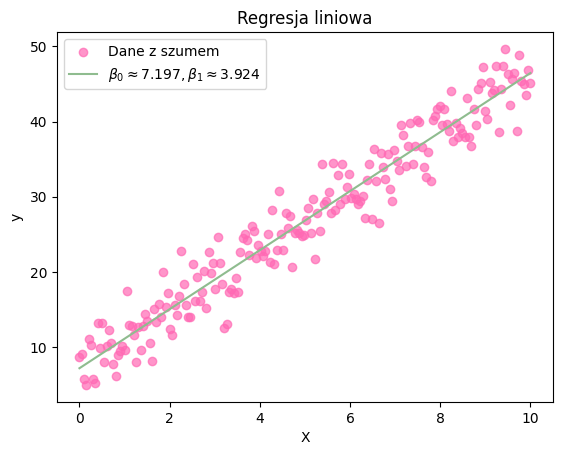

In [222]:
n=200
x1 = np.linspace(0, 10, n)
X1 = np.column_stack((np.ones(n), x1))
noise = np.random.normal(0, 3, n)
y1 = 4 * x1 + 7 + noise
beta_hat = regresja(X1, y1).flatten()
plt.scatter(x1, y1, color='hotpink', alpha=0.7, label='Dane z szumem')
plt.plot(x1, X1 @ beta_hat, color='darkseagreen', label=rf'$ \beta_0 \approx {beta_hat[0]:.3f}, \beta_1 \approx {beta_hat[1]:.3f}$')
plt.legend();plt.xlabel('X');plt.ylabel('y')
plt.title('Regresja liniowa')
plt.show()


### zadanie 2
Regresja liniowa z `scikit-learn`: Użyj klasy `LinearRegression` z biblioteki `scikit-learn` do rozwiązania problemu z zadania 1. Porównaj uzyskane współczynniki z własną implementacją. Następnie, użyj publicznie dostępnego zbioru danych (np. Boston Housing) do zbudowania modelu regresji wielokrotnej.

In [219]:
from sklearn.linear_model import LinearRegression

In [241]:
reg = LinearRegression().fit(X1, y1)
reg.intercept_, reg.coef_

(np.float64(7.197301687411112), array([0.       , 3.9244054]))

In [228]:
beta_hat

array([7.19730169, 3.9244054 ])

In [242]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
X = data[column_names[:-1]]
y = data[column_names[-1]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [243]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [252]:
reg = LinearRegression().fit(X_train, y_train)
reg.coef_, reg.intercept_

(array([-6.99601623e-02,  3.89574404e-02, -2.33931140e-02,  3.67507604e+00,
        -1.55552219e+01,  4.21427389e+00, -1.21717461e-02, -1.43456818e+00,
         2.45002224e-01, -1.10650746e-02, -8.71982022e-01,  8.95665537e-03,
        -4.55186678e-01]),
 np.float64(31.625728777325627))

In [245]:
y_pred = reg.predict(X_test)

### zadanie 3
Metryki oceny regresji: Oblicz i zinterpretuj podstawowe metryki oceny modelu regresji: średni błąd kwadratowy (MSE), pierwiastek średniego błędu kwadratowego (RMSE), średni błąd bezwzględny (MAE) oraz współczynnik determinacji (R2).

In [247]:
def MSE(y, y_pred):
    n = len(y)
    mse = sum((y - y_pred)**2)/n
    # mse2 = sum([(y[i] - y_pred[i])**2 for i in range(n)])/n
    return mse

def RMSE(y, y_pred):
    return np.sqrt(MSE(y, y_pred))

def MAE(y, y_pred):
    n = len(y)
    mae = sum(abs(y - y_pred))/n
    return mae

def R2(y, y_pred):
    y_mean = sum(y)/len(y)
    # r2 = sum((y_pred-y_mean)**2)/sum((y - y_mean)**2) alternatywny wzór
    r2 = 1 - sum((y - y_pred)**2)/sum((y - y_mean)**2) # z wykładu
    return r2

In [248]:
MSE(y_test, y_pred)

26.654181198512713

In [249]:
RMSE(y_test, y_pred)

np.float64(5.162768753151037)

In [250]:
MAE(y_test, y_pred)

3.190475203894438

In [251]:
R2(y_test, y_pred)

0.6985154965551281

### zadanie 4
Regularyzacja - Ridge i Lasso: Wprowadź szum do danych z zadania 1. Zbuduj model regresji liniowej, regresji grzbietowej (`Ridge`) i regresji lasso (`Lasso`). Porównaj współczynniki modeli i wyjaśnij, jak regularyzacja wpływa na wagę cech.

In [254]:
from sklearn.linear_model import Ridge, Lasso
linear = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
y_linear = linear.predict(X_train)
y_lasso = lasso.predict(X_test)
y_ridge = ridge.predict(X_test)
print("linear R²:", linear.score(X_test, y_test))
print("Współczynniki:", linear.coef_, linear.intercept_)
print("lasso R²:", lasso.score(X_test, y_test))
print("Współczynniki:", lasso.coef_, linear.intercept_)
print("ridge R²:", ridge.score(X_test, y_test))
print("Współczynniki:", ridge.coef_, linear.intercept_)


linear R²: 0.9377864364360426
Współczynniki: [0.         3.95634556] 7.054498412658269
lasso R²: 0.9380502992442115
Współczynniki: [0.         3.94434527] 7.054498412658269
ridge R²: 0.9378536579115759
Współczynniki: [0.         3.95338046] 7.054498412658269


### zadanie 5
Wprowadzenie do regresji logistycznej: Zaimplementuj funkcję sigmoidalną w Pythonie. Wyjaśnij jej rolę w regresji logistycznej i zwizualizuj jej przebieg. Omów, dlaczego jest ona używana w problemach klasyfikacji binarnej.

In [255]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

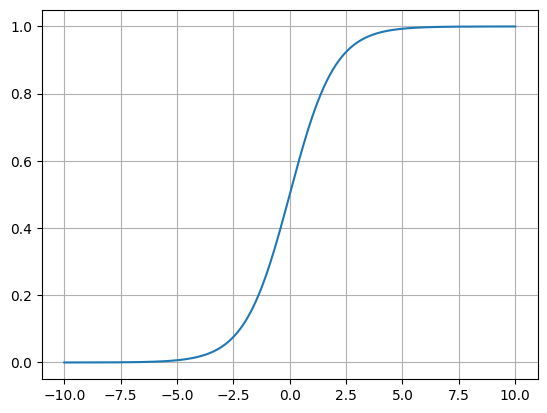

In [256]:
x = np.linspace(-10, 10, 300)
y = sigmoid(x)
plt.plot(x, y); plt.grid()

### zadanie 6
Implementacja regresji logistycznej z `scikit-learn`: Wczytaj publiczny zbiór danych do klasyfikacji (np. `Titanic` lub `Breast Cancer`). Podziel dane na zbiór treningowy i testowy. Wytrenuj model regresji logistycznej i dokonaj predykcji.

In [260]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
data = fetch_openml(name='titanic', version=1).frame
X = data.drop(columns = ['survived', 'name', 'fare', 'cabin', 'home.dest', 'ticket', 'boat', 'body'])
y = data['survived']
X['age'] = X.groupby(['pclass', 'sex'], observed=True)['age'].transform(lambda x: x.fillna(x.median()))
dummies = []
for col in X.select_dtypes(include=['object', 'category']).columns:
    if X[col].nunique()<=5:
        dummies.append(col)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(X[dummies])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(dummies))
data_smart = pd.concat([X.drop(columns=dummies), encoded_df], axis=1)
data_smart.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,1,29.0000,0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0.9167,1,2,0.0,1.0,0.0,0.0,1.0,0.0
2,1,2.0000,1,2,1.0,0.0,0.0,0.0,1.0,0.0
3,1,30.0000,1,2,0.0,1.0,0.0,0.0,1.0,0.0
4,1,25.0000,1,2,1.0,0.0,0.0,0.0,1.0,0.0


In [261]:
X_train, X_test, y_train, y_test = train_test_split(data_smart, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter = 500)
log_reg.fit(X_train_scaled, y_train)
# log_reg.score(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

### zadanie 7
Metryki oceny klasyfikacji: Dla modelu z zadania 6, oblicz i zinterpretuj następujące metryki: dokładność (`accuracy`), precyzję (`precision`),
czułość (`recall`) oraz macierz pomyłek (`confusion matrix`).

Accuracy: 0.767175572519084
Precision: 0.8827586206896552
Recall: 0.7441860465116279


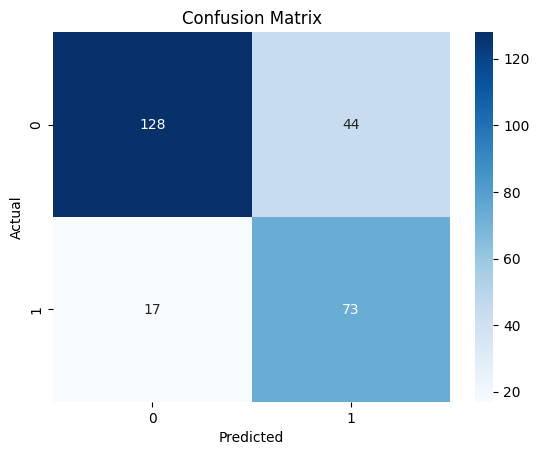

Confusion matrix:
 [[128  44]
 [ 17  73]]


In [262]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
accuracy = accuracy_score(y_test, y_pred)
label='0' #Dead
precision = precision_score(y_test, y_pred, pos_label=label)
recall = recall_score(y_test, y_pred, pos_label=label)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion matrix:\n", cm)